### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

### Read the CSV Files

In [2]:
#read csv files in

df2019 = pd.read_csv("NBA_data/NBA_Season_avgs_2019.csv")
df2018 = pd.read_csv("NBA_data/NBA_Season_avgs_2018.csv")
df2017 = pd.read_csv("NBA_data/NBA_Season_avgs_2017.csv")
df2016 = pd.read_csv("NBA_data/NBA_Season_avgs_2016.csv")
df2015 = pd.read_csv("NBA_data/NBA_Season_avgs_2015.csv")
df2014 = pd.read_csv("NBA_data/NBA_Season_avgs_2014.csv")

In [3]:
df2015

,RK,Team,Year,G,W,L,Conf,MP,FG,FGA,...,FTA,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,1,Golden State Warriors*,2015,82,67,15,West,240.6,41.6,87.0,...,20.8,0.768,10.4,34.3,27.4,9.3,6.0,14.5,19.9,110.0
1,2,Los Angeles Clippers*,2015,82,56,26,West,240.6,39.4,83.3,...,25.2,0.710,9.6,33.1,24.8,7.8,5.0,12.3,21.3,106.7
2,3,Dallas Mavericks*,2015,82,50,32,West,242.4,39.7,85.8,...,22.5,0.752,10.5,31.8,22.5,8.1,4.5,13.0,20.0,105.2
3,4,Oklahoma City Thunder,2015,82,45,37,West,241.8,38.8,86.8,...,24.6,0.754,12.8,34.7,20.5,7.3,5.5,14.7,22.3,104.0
4,5,Toronto Raptors*,2015,82,49,33,East,242.1,37.9,83.3,...,24.6,0.787,10.7,30.8,20.7,7.5,4.4,12.9,20.9,104.0
5,6,Houston Rockets*,2015,82,56,26,West,241.5,37.0,83.3,...,26.0,0.715,11.7,32.0,22.2,9.5,5.0,16.7,22.0,103.9
6,7,San Antonio Spurs*,2015,82,55,27,West,243.4,39.1,83.6,...,21.4,0.780,9.8,33.8,24.4,8.0,5.4,14.0,19.1,103.2
7,8,Cleveland Cavaliers*,2015,82,53,29,East,241.2,37.7,82.2,...,23.6,0.751,11.1,31.9,22.1,7.4,4.1,14.3,18.4,103.1
8,9,Portland Trail Blazers*,2015,82,51,31,West,242.1,38.7,86.0,...,19.4,0.801,10.7,35.1,21.9,6.4,4.5,13.6,18.2,102.8
9,10,Atlanta Hawks*,2015,82,60,22,East,240.6,38.1,81.7,...,21.2,0.778,8.7,31.8,25.7,9.1,4.6,14.2,17.8,102.5


|Column name|Description|
|--|--|
|Rk|Rank|
|G|Games|
|MP|Minutes Played|
|FG|Field Goals (shots made)|
|FGA|Field Goal Attempts (shots attempted)|
|FG%|Field Goal Percentage (shot percentage)|
|3P|3-Point Field Goals (3 pt shots)|
|3PA|3-Point Field Goal Attempts (3 pts attempts)|
|3P%|3-Point Field Goal Percentage (3 pt percentage)|
|2P|2-Point Field Goals (offense)|
|2PA|2-point Field Goal Attempts (offense)|
|2P%|2-Point Field Goal Percentage (offense)|
|FT|Free Throws (offense)|
|FTA|Free Throw Attempts (offense)|
|FT%|Free Throw Percentage (offense)|
|ORB|Offensive Rebounds (offense)|
|DRB|Defensive Rebounds (defense)|
|AST|Assists (offense)|
|STL|Steals (defense)|
|BLK|Blocks (defense)|
|TOV|Turnovers (defense)|

In [4]:
#combined all csv files
#dropped team name and conference because not applicable to making the playoffs
#dropped Rank, games, wins, losses because a teams win record is highly correlated with their chances to make the playoffs
#drop all 3P, 3PA, 2P, and 2PA because they are highly correlated with percentages

In [5]:
# combine files and dropped offensive statistics
df_new = pd.concat([df2019, df2018, df2017, df2016, df2015, df2014], axis=0)
df_new["playoffs_y_n"] = df_new["Team"].map(lambda x: 1 if "*" in x else 0)
#defined feature columns
df_new = df_new.drop(["Team", 'Year', 'RK', "Conf", 'G', 'W', 'L', 'FG', 'FGA', '3P', '3PA','2P', '2PA', 'FT', 'FTA'], axis=1)

df_new

,MP,FG%,3P%,2P%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS,playoffs_y_n
0,241.2,0.476,0.353,0.565,0.773,9.3,40.4,26.0,7.5,5.9,13.9,19.6,118.1,1
1,241.5,0.491,0.385,0.557,0.801,9.7,36.5,29.4,7.6,6.4,14.3,21.4,117.7,1
2,240.9,0.473,0.344,0.536,0.761,11.1,36.2,27.0,7.4,5.4,14.8,21.1,115.4,0
3,241.5,0.471,0.359,0.529,0.771,10.9,36.9,26.9,7.4,5.3,14.9,21.3,115.2,1
4,241.8,0.471,0.388,0.507,0.792,9.7,35.8,24.0,6.8,4.7,14.5,23.3,115.1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,240.6,0.435,0.333,0.470,0.777,12.0,30.5,21.0,7.1,4.2,15.4,21.3,96.2,0
26,241.5,0.464,0.353,0.487,0.741,11.6,30.8,21.9,7.7,4.6,13.7,19.1,96.1,1
27,242.4,0.438,0.353,0.464,0.747,11.8,29.3,21.5,6.6,4.9,15.1,20.9,95.5,0
28,241.2,0.444,0.344,0.474,0.747,11.0,30.2,20.3,7.0,4.5,14.6,20.7,95.0,0


In [6]:
#define X
X = df_new.iloc[:,:13]
#define y
y = df_new["playoffs_y_n"]

In [7]:
X.head()

,MP,FG%,3P%,2P%,FT%,ORB,DRB,AST,STL,BLK,TOV,PF,PTS
0,241.2,0.476,0.353,0.565,0.773,9.3,40.4,26.0,7.5,5.9,13.9,19.6,118.1
1,241.5,0.491,0.385,0.557,0.801,9.7,36.5,29.4,7.6,6.4,14.3,21.4,117.7
2,240.9,0.473,0.344,0.536,0.761,11.1,36.2,27.0,7.4,5.4,14.8,21.1,115.4
3,241.5,0.471,0.359,0.529,0.771,10.9,36.9,26.9,7.4,5.3,14.9,21.3,115.2
4,241.8,0.471,0.388,0.507,0.792,9.7,35.8,24.0,6.8,4.7,14.5,23.3,115.1


In [8]:
X.columns

Index(['MP', 'FG%', '3P%', '2P%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [9]:
from sklearn.model_selection import train_test_split # Importing this from model_evaluation instead of cross_val

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75) # and creating a train and test set using TTS

In [10]:
#identify if the data is balanced
y_train.value_counts(normalize=True)

1    0.540741
0    0.459259
Name: playoffs_y_n, dtype: float64

In [11]:
#import model
from sklearn.linear_model import LogisticRegression
#instanstiate model
logreg = LogisticRegression(max_iter=1000, random_state = 10)
# fit
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [12]:
logreg.score(X_test, y_test)

0.6222222222222222

In [13]:
#use predict_proba, examine the predicted probabilities for the first handful of rows of X.
logreg.predict_proba(X)

array([[0.05275841, 0.94724159],
       [0.09048379, 0.90951621],
       [0.26220429, 0.73779571],
       [0.26481808, 0.73518192],
       [0.5590595 , 0.4409405 ],
       [0.39764929, 0.60235071],
       [0.1527119 , 0.8472881 ],
       [0.14260286, 0.85739714],
       [0.22774376, 0.77225624],
       [0.27792365, 0.72207635],
       [0.3208377 , 0.6791623 ],
       [0.62191461, 0.37808539],
       [0.18120557, 0.81879443],
       [0.074194  , 0.925806  ],
       [0.71978202, 0.28021798],
       [0.33603259, 0.66396741],
       [0.23262659, 0.76737341],
       [0.16525971, 0.83474029],
       [0.24944777, 0.75055223],
       [0.20487317, 0.79512683],
       [0.57340961, 0.42659039],
       [0.12519851, 0.87480149],
       [0.49616288, 0.50383712],
       [0.22330428, 0.77669572],
       [0.70994923, 0.29005077],
       [0.34215045, 0.65784955],
       [0.50159248, 0.49840752],
       [0.58056684, 0.41943316],
       [0.87323991, 0.12676009],
       [0.27684915, 0.72315085],
       [0.

In [14]:
logreg.predict_proba(X_test)

array([[0.84146921, 0.15853079],
       [0.57340961, 0.42659039],
       [0.38349924, 0.61650076],
       [0.18033428, 0.81966572],
       [0.14260286, 0.85739714],
       [0.39254548, 0.60745452],
       [0.6132063 , 0.3867937 ],
       [0.36233546, 0.63766454],
       [0.42385783, 0.57614217],
       [0.59562081, 0.40437919],
       [0.51628736, 0.48371264],
       [0.53197718, 0.46802282],
       [0.49438302, 0.50561698],
       [0.41640013, 0.58359987],
       [0.31069915, 0.68930085],
       [0.71653509, 0.28346491],
       [0.45220813, 0.54779187],
       [0.34215045, 0.65784955],
       [0.12198908, 0.87801092],
       [0.39753868, 0.60246132],
       [0.27792365, 0.72207635],
       [0.35598289, 0.64401711],
       [0.62679341, 0.37320659],
       [0.12233358, 0.87766642],
       [0.89589883, 0.10410117],
       [0.69900228, 0.30099772],
       [0.27612606, 0.72387394],
       [0.42945263, 0.57054737],
       [0.1527119 , 0.8472881 ],
       [0.52982797, 0.47017203],
       [0.

In [15]:
def plot_roc(true, proba):
    fpr, tpr, _ = metrics.roc_curve(true, proba)
    auc = metrics.roc_auc_score(true, proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()

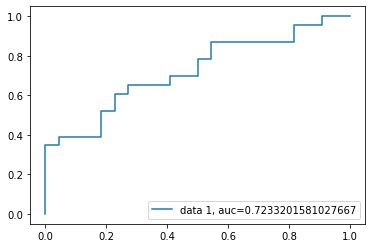

In [16]:
plot_roc(y_test, logreg.predict_proba(X_test)[:,1])

In [17]:
y_test

28    0
20    0
4     1
1     1
7     1
21    0
17    0
22    1
26    0
28    0
10    1
10    0
12    0
4     1
9     1
3     1
29    0
25    0
13    1
20    1
9     0
25    0
25    0
2     1
16    0
20    1
4     1
2     0
6     1
12    1
26    0
12    1
11    1
24    0
17    0
3     1
15    1
28    1
4     1
29    0
1     1
0     1
3     0
29    0
29    0
Name: playoffs_y_n, dtype: int64

In [18]:
logreg.predict_proba(X_test)[:,1]

array([0.15853079, 0.42659039, 0.61650076, 0.81966572, 0.85739714,
       0.60745452, 0.3867937 , 0.63766454, 0.57614217, 0.40437919,
       0.48371264, 0.46802282, 0.50561698, 0.58359987, 0.68930085,
       0.28346491, 0.54779187, 0.65784955, 0.87801092, 0.60246132,
       0.72207635, 0.64401711, 0.37320659, 0.87766642, 0.10410117,
       0.30099772, 0.72387394, 0.57054737, 0.8472881 , 0.47017203,
       0.49840752, 0.15154112, 0.73466762, 0.53122699, 0.65998061,
       0.51155926, 0.45645831, 0.45505899, 0.57085139, 0.1420417 ,
       0.6107293 , 0.97938661, 0.39284357, 0.43883399, 0.2609779 ])

In [19]:
from sklearn import linear_model, model_selection, metrics

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=46)
logit_simple = linear_model.LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [20]:
1. - y_train.mean()

0.4740740740740741

In [21]:
# What is our accuracy on the test set?
print(np.mean(y_test == logit_simple.predict(X_test)))

0.6


In [22]:
# Get probability predictions.
logit_pred_proba = logit_simple.predict_proba(X_test)[:,1]

In [23]:
cm = metrics.confusion_matrix(y_true=y_test, y_pred=logit_pred_proba > .5)
cm

array([[10, 10],
       [ 8, 17]], dtype=int64)

In [24]:
# 10 True Negatives 
# 10 False Positives 
# 8 False Negatives
# 17 True Positives

In [25]:
#define y
#run the TTS
#import model
#instanstiate model
#tune the model
#accuracy score or confusion matrix